In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score

In [23]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [24]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [26]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),          
    ('tfidf', TfidfTransformer()),         
    ('clf', MultinomialNB()),            
])

In [27]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

Accuracy: 0.9623318385650225
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



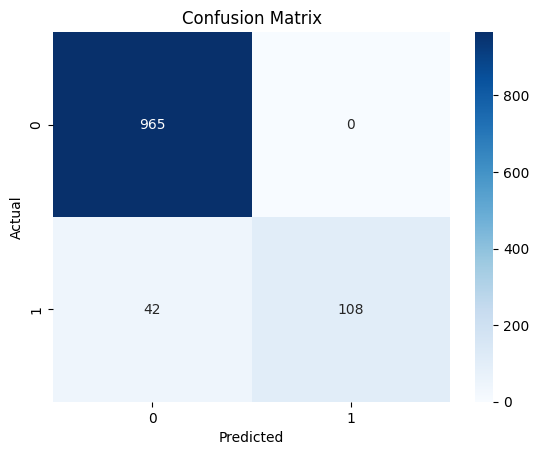

In [28]:
y_pred_nb = text_clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_nb))

cm = metrics.confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [29]:
test_msg = ["Hey! you need to change this part in the project"]
prediction = text_clf.predict(test_msg)
print("Spam" if prediction[0] else "Not Spam")

Not Spam


In [30]:
text_clf_lr = Pipeline([
    ('vect', CountVectorizer()),         
    ('tfidf', TfidfTransformer()),       
    ('clf', LogisticRegression(solver='liblinear')), 
])

In [31]:
text_clf_lr.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(solver='liblinear'))])

Accuracy: 0.967713004484305
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



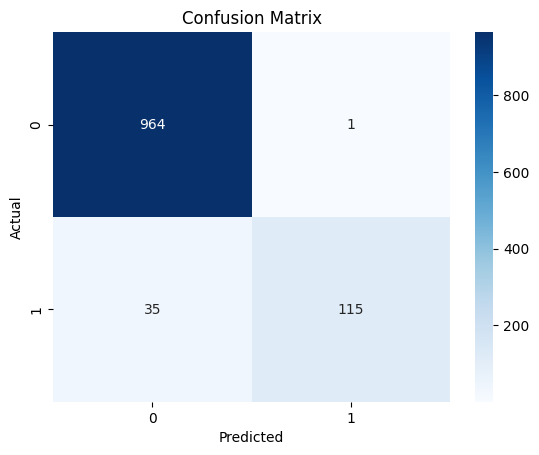

In [32]:
y_pred_lr = text_clf_lr.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_lr))

cm = metrics.confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [33]:
text_clf_rf = Pipeline([
    ('vect', CountVectorizer()),             
    ('tfidf', TfidfTransformer()),            
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42)) 
])

In [34]:
text_clf_rf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(random_state=42))])

Accuracy: 0.9748878923766816

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.82      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



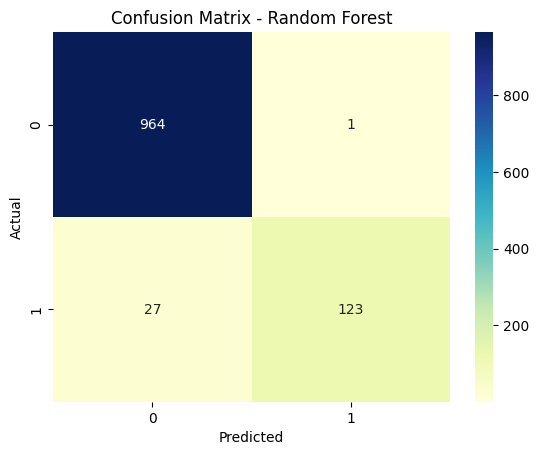

In [35]:
y_pred_rf = text_clf_rf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred_rf))

cm = metrics.confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [52]:
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [53]:
X_train_ann = X_train_tfidf.toarray().astype('float32')
X_test_ann = X_test_tfidf.toarray().astype('float32')
y_train_ann = np.array(y_train).astype('float32').reshape(-1, 1)
y_test_ann = np.array(y_test).astype('float32').reshape(-1, 1)

model_ann = Sequential()
model_ann.add(Dense(128, activation='relu', input_shape=(X_train_ann.shape[1],)))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [54]:
model_ann.fit(X_train_ann, y_train_ann, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8581 - loss: 0.4382 - val_accuracy: 0.9709 - val_loss: 0.0943
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9921 - loss: 0.0320 - val_accuracy: 0.9753 - val_loss: 0.0820
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9990 - loss: 0.0054 - val_accuracy: 0.9753 - val_loss: 0.0928
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9998 - loss: 0.0017 - val_accuracy: 0.9731 - val_loss: 0.1003
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 6.7276e-04 - val_accuracy: 0.9731 - val_loss: 0.1039


In [55]:
acc_ann = model_ann.evaluate(X_test_ann, y_test_ann, verbose=0)[1]
print(f"ANN Accuracy: {acc_ann:.4f}")

ANN Accuracy: 0.9785


In [56]:
vocab_size = 5000
max_len = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_seq = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_seq = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

y_train_cnn = np.array(y_train).astype('float32').reshape(-1, 1)
y_test_cnn = np.array(y_test).astype('float32').reshape(-1, 1)


In [57]:
embedding_dim = 64

model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [58]:
model_cnn.fit(X_train_seq, y_train_cnn, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8154 - loss: 0.4515 - val_accuracy: 0.9709 - val_loss: 0.1602
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9878 - loss: 0.0619 - val_accuracy: 0.9753 - val_loss: 0.0844
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9983 - loss: 0.0081 - val_accuracy: 0.9731 - val_loss: 0.0853
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.9798 - val_loss: 0.1009
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 5.4142e-04 - val_accuracy: 0.9798 - val_loss: 0.1083


In [59]:
acc_cnn = model_cnn.evaluate(X_test_seq, y_test_cnn, verbose=0)[1]
print(f"CNN Accuracy: {acc_cnn:.4f}")

CNN Accuracy: 0.9857


In [ ]:
history = model_cnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


In [61]:
y_pred_cnn = (model_cnn.predict(X_test_seq) > 0.5).astype('int')
print(classification_report(y_test_cnn, y_pred_cnn))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       965
         1.0       0.97      0.93      0.95       150

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


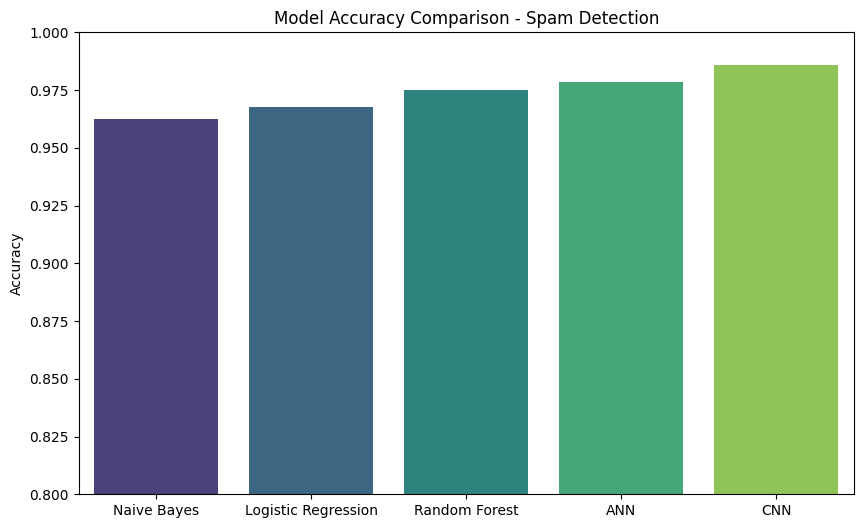

In [63]:
accuracies = {
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'ANN': acc_ann,
    'CNN': acc_cnn
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.title("Model Accuracy Comparison - Spam Detection")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.show()
